### Imports

In [1]:
from skimage import io, color, filters
from skimage.filters import threshold_otsu
from skimage.util import invert

from PIL import Image, ImageFilter

import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

### Functions

In [2]:
def grey_image_transform(image):
    return color.rgb2gray(image)

def binarize_image(image):
    thresh = threshold_otsu(image)
    image = image > thresh
    return image

def get_image_edges(image):
    image = grey_image_transform(image)
    image = binarize_image(image)
    image = invert(image)
    edges = filters.sobel(image)
    edges = binarize_image(edges)
    return edges

def get_pillow_image_edges(image):
    image = image.convert("L")    # Converting Image to Gray
    edges = image.filter(ImageFilter.FIND_EDGES)
    edges = np.array(edges)
    edges = binarize_image(edges)
    return edges

def plot_images(image, chull):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()

    ax[0].set_title('Original picture')
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_axis_off()

    ax[1].set_title('Transformed picture')
    ax[1].imshow(chull, cmap=plt.cm.gray)
    ax[1].set_axis_off()

    plt.tight_layout()
    plt.show()  

### Read Data and Get Edges Information

In [3]:
# input_dir = './../../data/images/'
# output_dir = './../../data/results/img_processing/'


input_dir = './../../../temp_data/images/'
output_dir = './../../../temp_data/results/img_processing/'

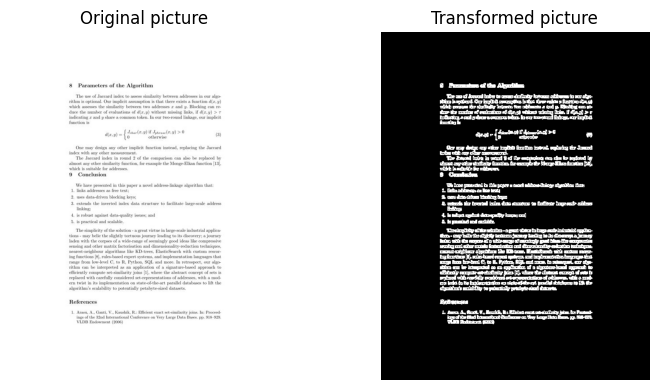

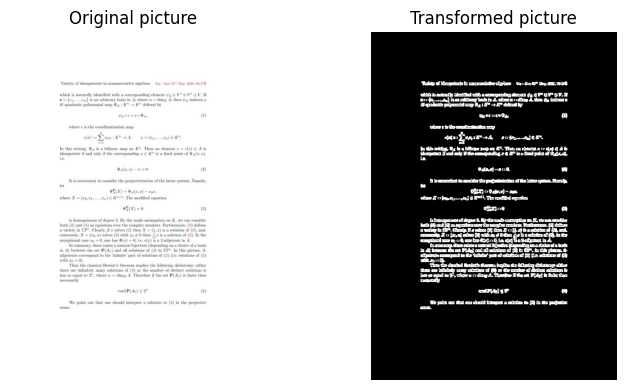

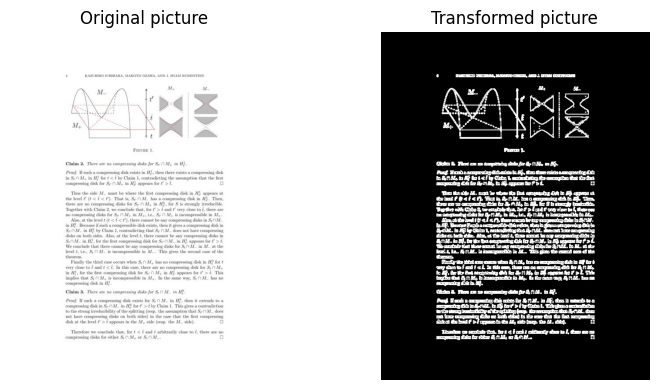

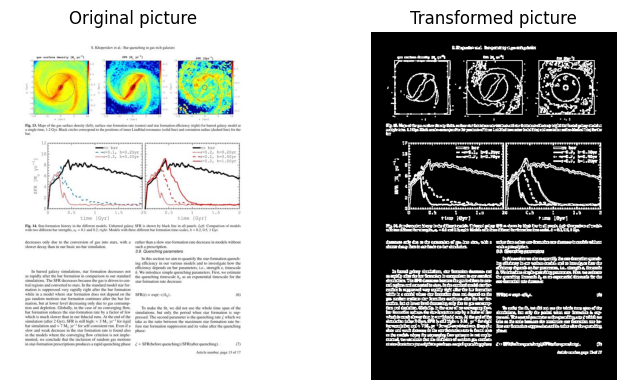

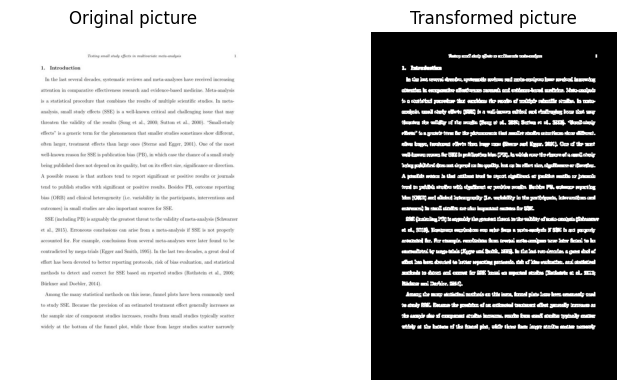

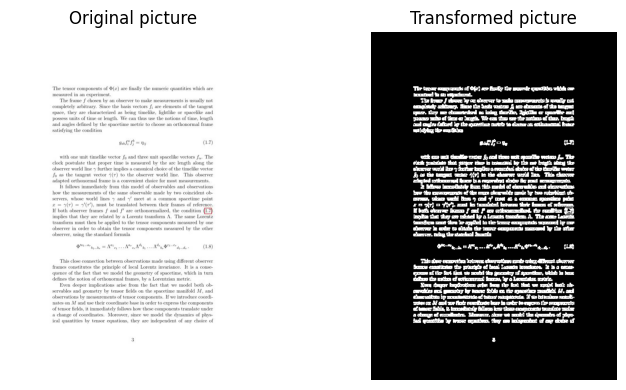

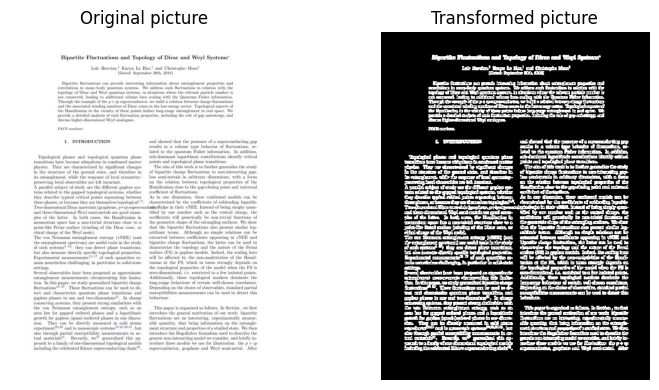

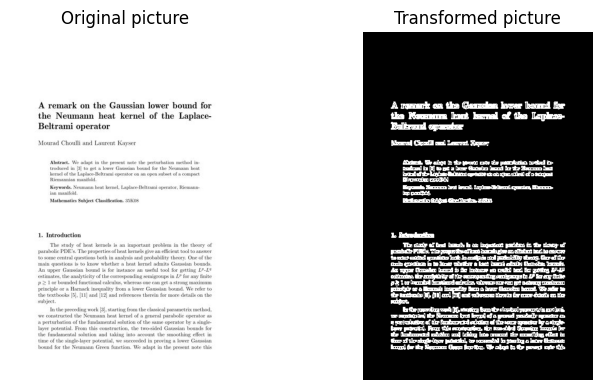

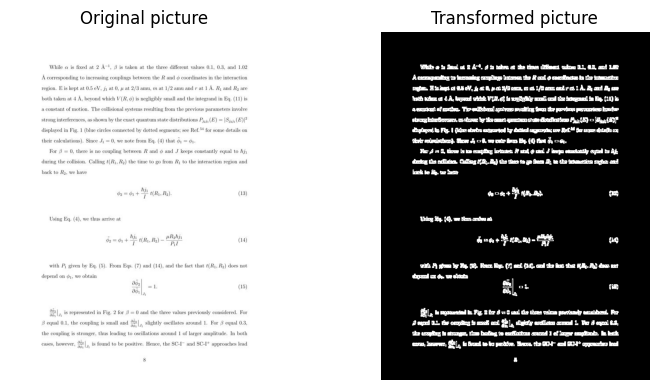

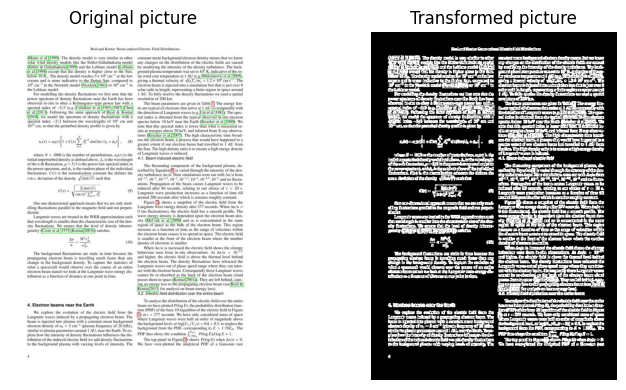

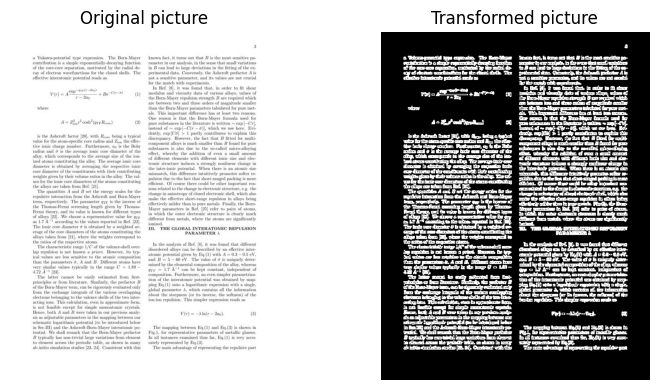

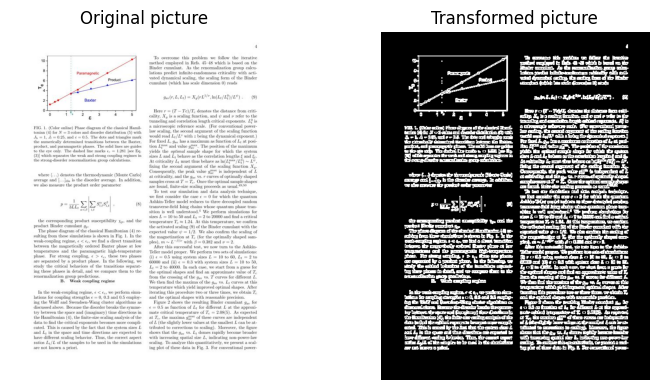

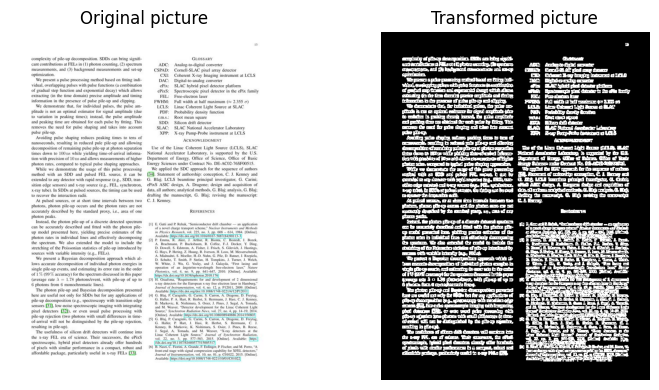

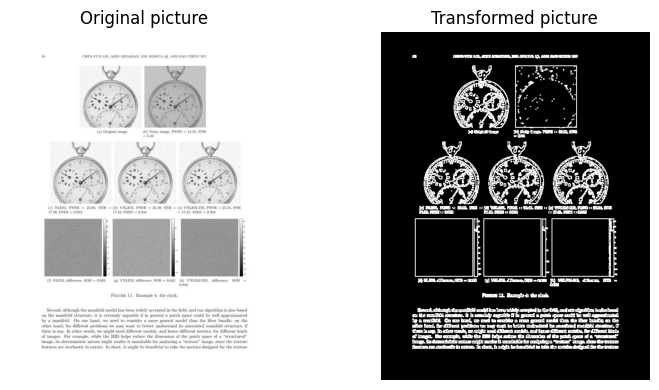

KeyboardInterrupt: 

In [4]:
dir_list = os.listdir(input_dir)
results = {}

for image in dir_list:
    img = io.imread(input_dir + image)
    edges = get_image_edges(img)
    results[image] = edges
    plot_images(img,edges)

### Get PILLOW library detected Edges

In [5]:
dir_list = os.listdir(input_dir)
pillow_results = {}

for image in dir_list:
    img = Image.open(input_dir + image)
    edges = get_pillow_image_edges(img)
    pillow_results[image] = edges
#     plot_images(img,edges)

### Store Results

In [6]:
## Values get stored as True, if they are edges detected else False

with open(output_dir+'edges_results.pkl', 'wb') as outp:  # Overwrites any existing file.
    pickle.dump(results, outp, pickle.HIGHEST_PROTOCOL)
    
with open(output_dir+'pillow_edges_results.pkl', 'wb') as outp:  # Overwrites any existing file.
    pickle.dump(results, outp, pickle.HIGHEST_PROTOCOL)